In [37]:
# for importing dataset
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path
import os
print(os.listdir('/Users/okabe_rintarou/Documents/Padras_doc_clustering'))

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

['first.numbers', '.DS_Store', 'text-clustering.ipynb', 'doc_clustering.py', 'your_csv.csv', 'Text Clustering.xlsx', '.ipynb_checkpoints', 'second.xlsx']


In [38]:
# importing the excel file
data = pd.read_excel('second.xlsx', header = None)

# converting the data  to csv format
data.to_csv('your_csv(V2).csv', encoding='utf-8')

# reading the data in csv format
data = pd.read_csv('your_csv(V2).csv')

# getting the shape
data.shape

(89, 2)

In [39]:
# assigning names to the columns

data.columns = ['Id', 'Text']

# checking the names of the columns
data.columns

Index(['Id', 'Text'], dtype='object')

In [40]:
# getting the length of the text as another feature

data['Length'] = data['Text'].apply(len)

In [41]:
# describing the dataset

data.groupby('Length').describe().head(20)

Id                                        
       count  mean std   min   25%   50%   75%   max
Length                                              
77       1.0  67.0 NaN  67.0  67.0  67.0  67.0  67.0
107      1.0  63.0 NaN  63.0  63.0  63.0  63.0  63.0
129      1.0  32.0 NaN  32.0  32.0  32.0  32.0  32.0
137      1.0  53.0 NaN  53.0  53.0  53.0  53.0  53.0
150      1.0  45.0 NaN  45.0  45.0  45.0  45.0  45.0
170      1.0  44.0 NaN  44.0  44.0  44.0  44.0  44.0
239      1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0
289      1.0  39.0 NaN  39.0  39.0  39.0  39.0  39.0
305      1.0  47.0 NaN  47.0  47.0  47.0  47.0  47.0
319      1.0  31.0 NaN  31.0  31.0  31.0  31.0  31.0
362      1.0  43.0 NaN  43.0  43.0  43.0  43.0  43.0
382      1.0  34.0 NaN  34.0  34.0  34.0  34.0  34.0
399      1.0  52.0 NaN  52.0  52.0  52.0  52.0  52.0
443      1.0  88.0 NaN  88.0  88.0  88.0  88.0  88.0
457      1.0  41.0 NaN  41.0  41.0  41.0  41.0  41.0
499      1.0   2.0 NaN   2.0   2.0   2.0   2.0   2.0
532      1.0  54.0 NaN  54.0  54.0  54.0  54.0  54.0
540      1.0  62.0 NaN  62.0  62.0  62.0  62.0  62.0
541      1.0  46.0 NaN  46.0  46.0  46.0  46.0  46.0
576      1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0

In [42]:
# looking at the head of the data

data.head()

,Id,Text,Length
0,0,\nBias and Debias in Recommender System: A Sur...,1314
1,1,The\nterminology “bias” is widely used in the ...,606
2,2,The summary of\ndebiasing methods reviewed in ...,499
3,3,1 INTRODUCTION\nBeing able to provide personal...,942
4,4,Permission to make digital or hard copies of a...,576


/Users/okabe_rintarou/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

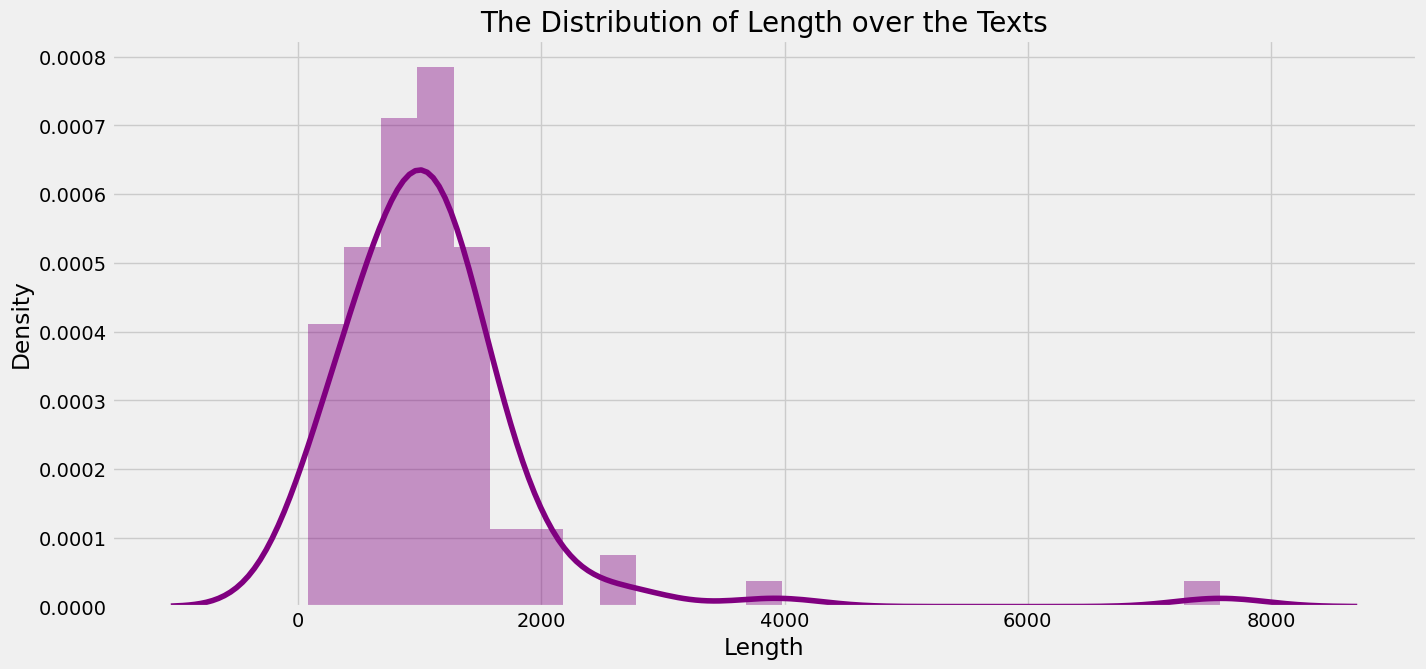

In [43]:


# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)



Text(0.5, 1.0, 'WordCloud ')

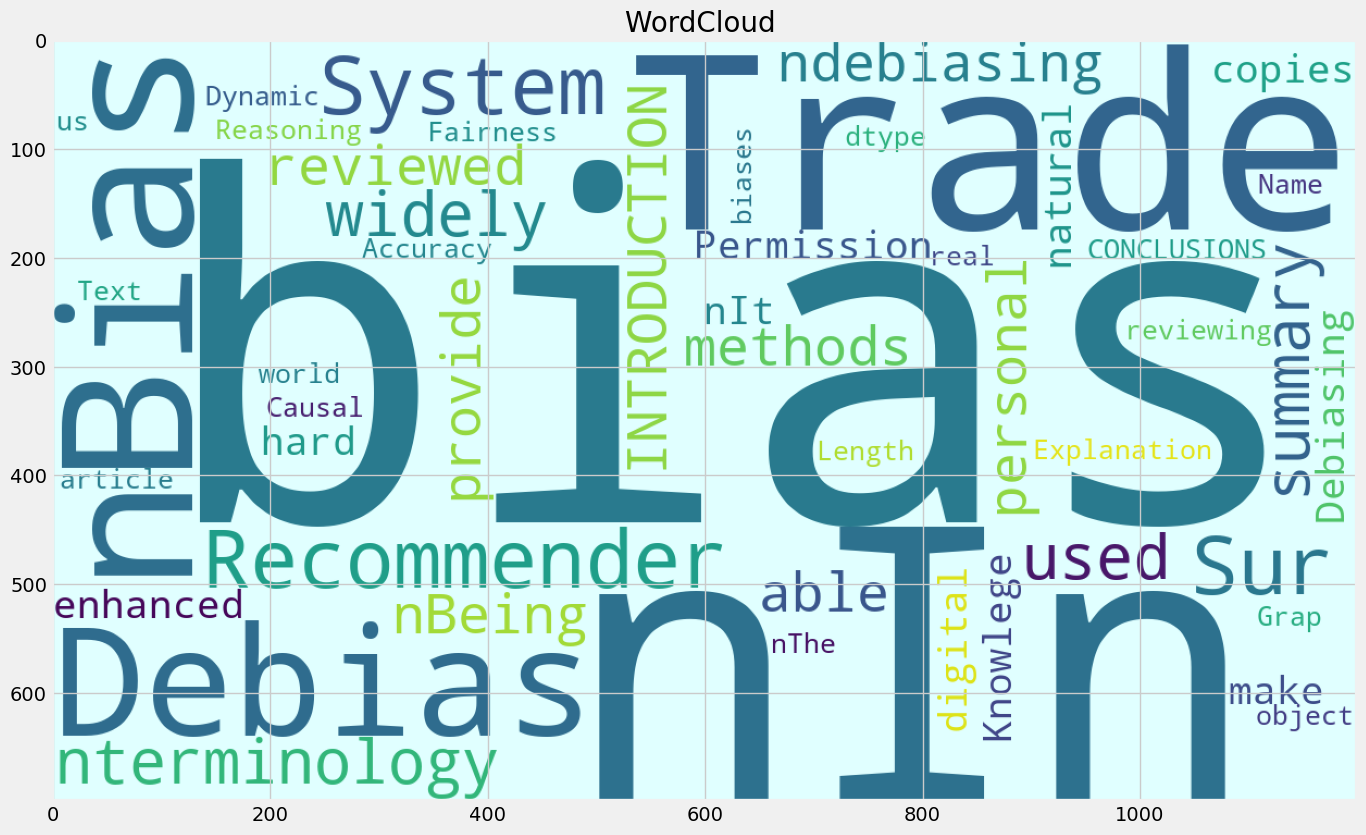

In [44]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['Text']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

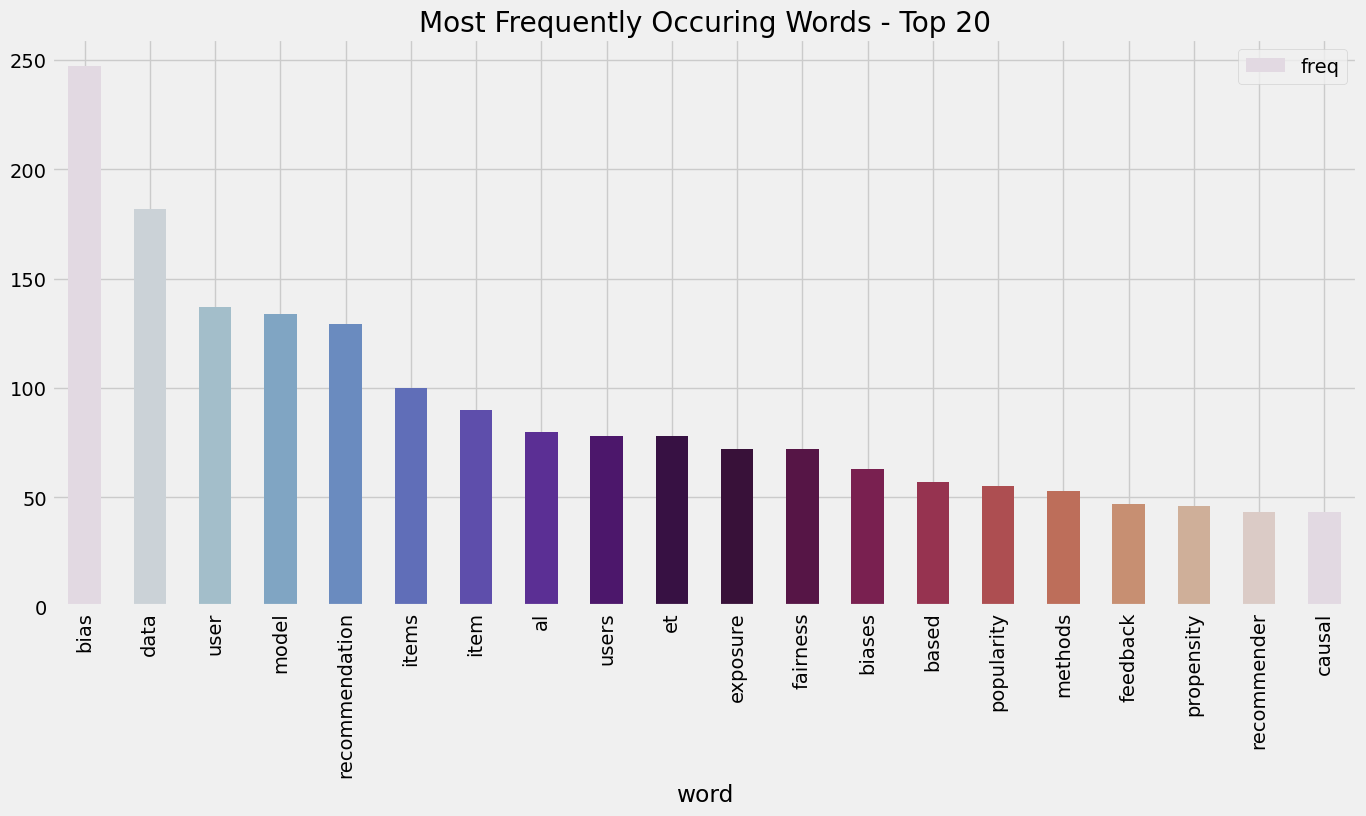

In [45]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

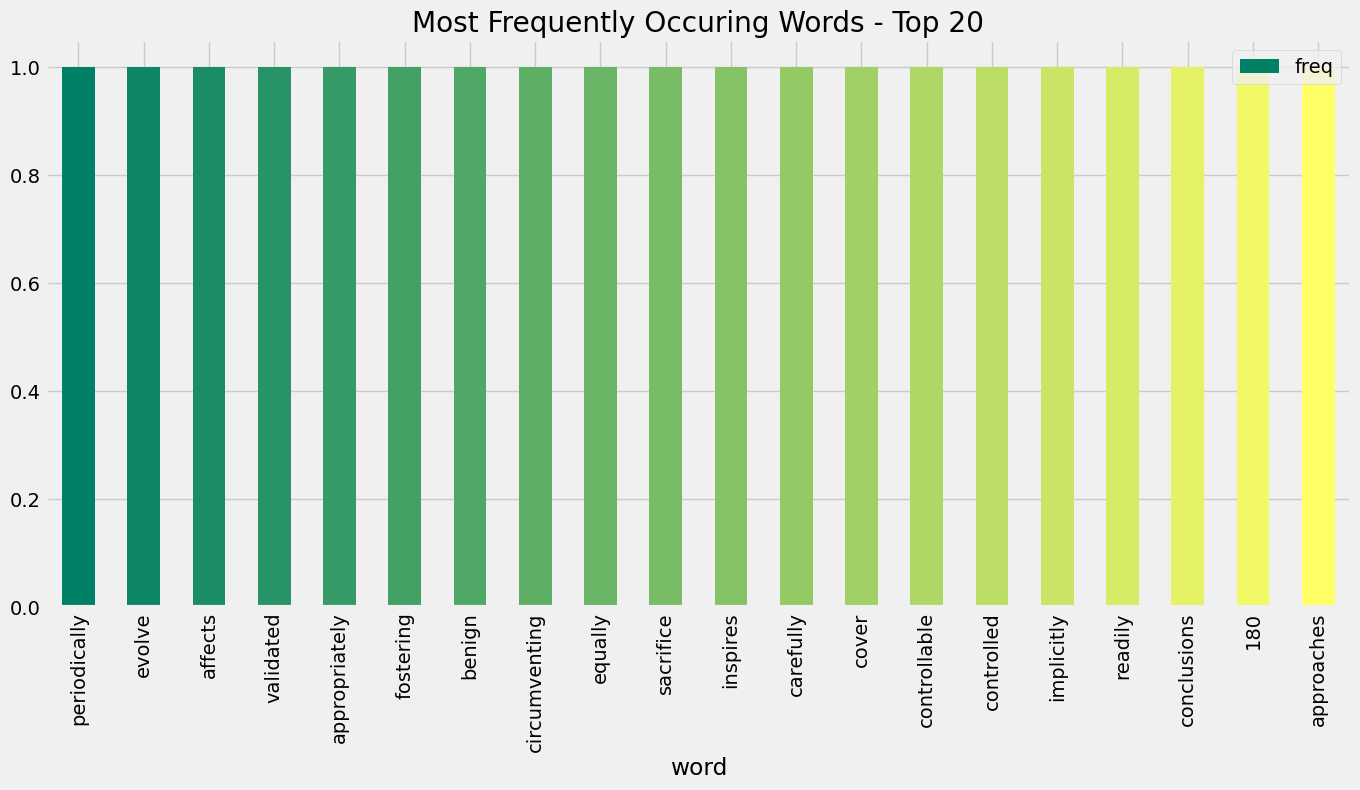

In [46]:


from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")



In [47]:


# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/okabe_rintarou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:


# cleaning the data

corpus = []

for i in range(0, 89):
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)



In [49]:
# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['Text'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (89, 2000)


In [52]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [53]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

# prediction on the Text no. 1
Y = vectorizer.transform(["Bias and Debias in Recommender System: A Survey and Future Directions JIAWEI CHEN and HANDE DONG, University of Science and Technology of China, China XIANG WANG and FULI FENG, National University of Singapore, Singapore MENG WANG, Hefei University of Technology, China XIANGNAN HE†,University of Science and Technology of China, China While recent years have witnessed a rapid growth of research papers on recommender system (RS), most of the papers focus on inventing machine learning models to better fit user behavior data. However, user behavior data is observational rather than experimental. This makes various biases widely exist in the data, including but not limited to selection bias, position bias, exposure bias, and popularity bias. Blindly fitting the data without considering the inherent biases will result in many serious issues, e.g., the discrepancy between offline evaluation and online metrics, hurting user satisfaction and trust on the recommendation service, etc. To transform the large volume of research models into practical improvements, it is highly urgent to explore the impacts of the biases and perform debiasing when necessary. When reviewing the papers that consider biases in RS, we find that, to our surprise, the studies are rather fragmented and lack a systematic organization."])
prediction = model.predict(Y)
print("Cluster number :", prediction)

# Prediction on the Text no.2
Y = vectorizer.transform(["Biases not only draw increasing attention from the information retrieval academia, but also from the industry. For example, one competing task of KDD Cup 2020 organized by Alibaba is to handle the long-tail bias in E-commerce recommendation2. Necessity of this Survey. Although many papers are published on this topic recently, to the best of our knowledge, none of them has provided a global picture of the RS biases and corresponding debiasing techniques. Particularly, we find that current studies on this topic are rather fragmented — despite the wide usage of the terminology “bias” in the literature, its definition is usually vague and even inconsistent across papers. For example, some work use “selection bias” to denote the bias of observed rating values [ 140], while others use “observational bias” to refer to the same meaning instead [ 66]. More confusingly, the same terminology “selection bias” has been conceptualized differently in different publications [ 125,140,169]. Moreover, a considerable number of researchers do not explicitly mention “bias” or “debias” in the paper (e.g. [ 29,102,174]), but they indeed address one type of biases in RS; these significant related work is difficult to be retrieved by the researchers interested in the bias topic."])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Top terms per cluster:
Cluster 0:
 propensity
 item
 model
 al
 data
 et
 bias
 probability
 based
 user
Cluster 1:
 bias
 data
 user
 items
 biases
 recommendation
 model
 fairness
 popularity
 users


Prediction
Cluster number : [1]
Cluster number : [1]


/Users/okabe_rintarou/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
